# Singular value decomposition

This is the deepest, most universal, and most widely used theorem in all linear algebra applications. Absolutely any matrix admits this decomposition. Once you calculate it, you have access to almost all of its properties, from its range to its inverse, through its determinant and a complete interpretation of its associated linear transformation.

In a sense, this is why you've been learning linear algebra. In this introductory topic, you'll analyze this decomposition in detail, learn how to calculate it efficiently, and finally take a look at the first sample of its geometric implications. In the next topic, you'll see its power in action.

## The best decomposition

For any $m\times n$ matrix $A$, there exist orthogonal matrices $U$ and $V$ (of sizes $m$ and $n$, respectively), and a diagonal $m\times n$ matrix $\Sigma$ with non-negative entries, such that

$$
A = U \Sigma V^T.
$$


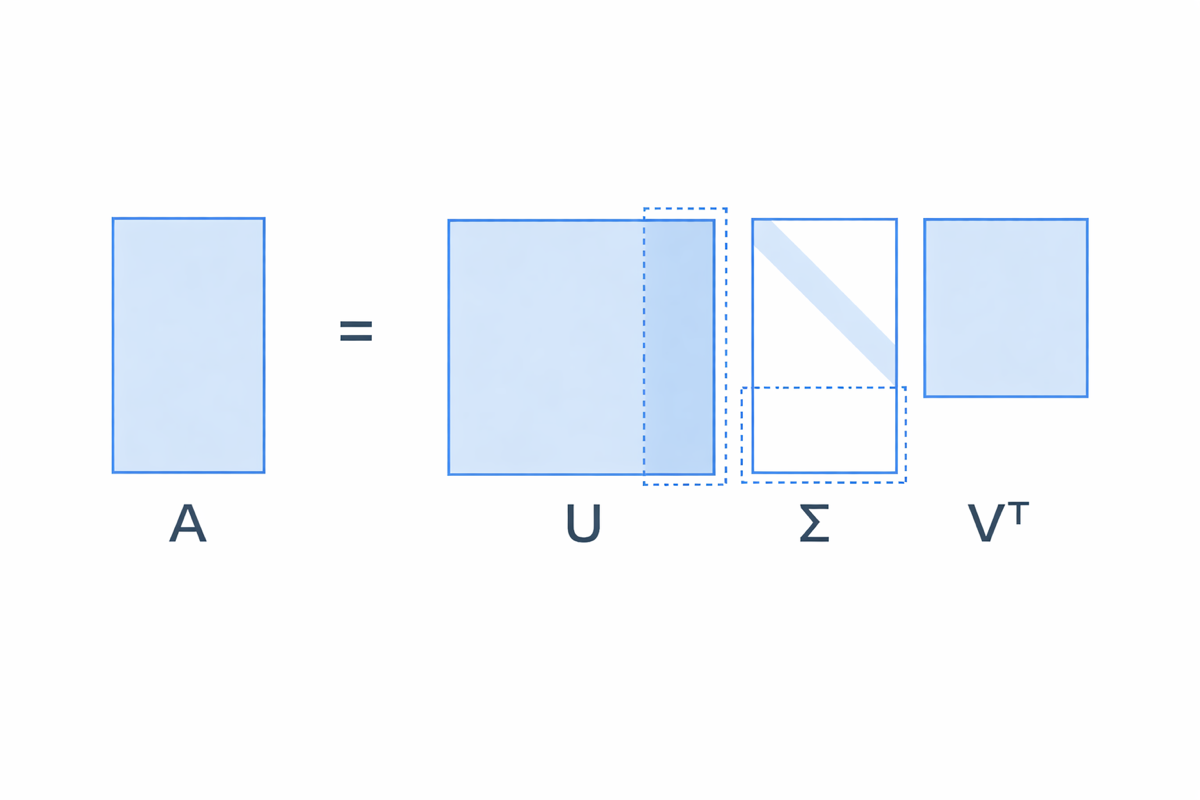

The fact that the rectangular matrix $\Sigma$ is meant to be diagonal simply means that its $(i,j)$-entry is $0$ whenever $i\ne j$. This decomposition brings with it a bit of terminology that's worth knowing now.

| Concept | Name | Definition |
|--------|------|------------|
| The diagonal entries of $\Sigma$ | Singular values of $A$ | The non-negative square roots of the eigenvalues of $AA^T$ |
| The columns of $U$ | Left singular vectors of $A$ | The eigenvectors of $AA^T$ |
| The columns of $V$ | Right singular vectors of $A$ | The eigenvectors of $A^TA$ |

### Proof of the singular value decomposition

You can suppose that $m\ge n$ and work with $A^TA$ — otherwise, you only need to use $AA^T$. Well, as you already know, the $n\times n$ matrix $A^TA$ is positive semidefinite. Thus it has a spectral decomposition

$$
A^TA = VDV^T
$$

with $n$ non-negative eigenvalues $d_1,d_2,\dots,d_n$ in the diagonal of $D$.

Thanks to this fact, you can build the $m\times n$ matrix $\Sigma$ by putting its $(j,j)$-entry as $\sqrt{d_j}$ and as $0$ otherwise. Of course, $\Sigma$ is the principal square root of $D$ but with extra zero rows so that it has the same number of rows as $A$. Then

$$
\Sigma^T\Sigma = D
$$

and this implies that

$$
A^TA
= VDV^T
= V\Sigma^T\Sigma V^T
= (\Sigma V^T)^T \Sigma V^T.
$$

Take a closer look at the last equation. You have just proved that

$$
A^TA = (\Sigma V)^T \Sigma V^T.
$$

This is the orthogonal freedom, so there exists an orthogonal matrix $U$ such that

$$
A = U\Sigma V^T.
$$

Yes, you have built the decomposition.

But you aren't done yet. You have to justify the terminology of the pieces. When the decomposition is ready, it's clear that

$$
A^TA
= (U\Sigma V^T)^T U\Sigma V^T
= V(\Sigma^T\Sigma)V^T.
$$

Since this is a diagonalization of $A^TA$, it follows that the columns of $V$ are eigenvectors of $A^TA$ and the entries in the main diagonal of $\Sigma^T\Sigma$ are the corresponding eigenvalues. You can easily verify the corresponding statements about $U$ and $AA^T$ in a very similar way.

## Practical computation

Actually, these definitions give you a rough method to calculate the decomposition:

1. Compute $AA^T$ and $A^TA$.
2. Find the eigenvalues of both $AA^T$ and $A^TA$ (they share the same eigenvalues).
3. Calculate the non-negative square roots of these eigenvalues and place them on the diagonal of $\Sigma$.
4. Compute the eigenvectors of $AA^T$, normalize them to have length $1$, and place them as the columns of $U$.
5. Do the same for $A^TA$ to build the matrix $V$.
6. Finally,
   $$
   A = U\Sigma V^T.
   $$

In the following section, you'll develop a much shorter algorithm.

## Building the decomposition

The method from the previous section has a serious drawback: you have to build two matrices, $AA^T$ and $A^TA$, and then build a spectral decomposition for each one. This sounds like a lot of work. Let's take a closer look at the pieces of the decomposition in order to improve the algorithm.

It's customary to denote the singular values as $\sigma_1,\sigma_2,\dots,\sigma_n$ and to order them in non-increasing order

$$
\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_{\min(m,n)}.
$$

Since $\Sigma$ is diagonal, its rank is the number of nonzero rows it has, which is therefore the number of non-zero singular values of $A$. If $r$ is the rank of $A$, then

$$
r=\operatorname{rank}(A)=\operatorname{rank}(U\Sigma V^T)=\operatorname{rank}(\Sigma),
$$

thus:

**The number of non-zero singular values of $A$ is exactly the rank $r$ of $A$.**

Hence,

$$
\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r > 0,
\qquad
\sigma_{r+1}=\cdots=\sigma_{\min(m,n)}=0.
$$

Let's analyze the pieces by expressing $U$ and $V$ in terms of their columns:

$$
U=[\,u_1\;u_2\;\cdots\;u_m\,],
\qquad
V=[\,v_1\;v_2\;\cdots\;v_n\,].
$$

The matrix equation

$$
A=U\Sigma V^T
$$

implies that

$$
AV=U\Sigma.
$$

Take a closer look at the columns of these new matrices:

$$
AV=[\,Av_1\;Av_2\;\cdots\;Av_n\,],
$$

$$
U\Sigma=[\,\sigma_1u_1\;\sigma_2u_2\;\cdots\;\sigma_ru_r\;0\;\cdots\;0\,].
$$

Since these two matrices are equal, their columns are equal too. This implies that the first $r$ columns of $U$ can be obtained by

$$
u_j=\frac{1}{\sigma_j}Av_j
\qquad \text{for all } j\in\{1,2,\dots,r\}.
$$

Then the rest of the columns of $U$ can be calculated by extending the available ones so that they form an orthonormal basis. So, you have developed an easier method to get the decomposition:

1. Start by computing $A^TA$.
2. Build a spectral decomposition for this matrix:
   $$
   A^TA = V(\Sigma^T\Sigma)V^T
   $$
   by ordering the positive singular values in decreasing order.
3. Compute
   $$
   u_j=\frac{1}{\sigma_j}Av_j
   \qquad \text{for every } j\in\{1,2,\dots,r\}.
   $$
4. Extend the set $\{u_1,u_2,\dots,u_r\}$ to an orthonormal basis and put the vectors as the columns of $U$.

Now, you should get your hands dirty with some examples.

## A direct example

Consider the following rectangular matrix:

$$
A=
\begin{pmatrix}
1 & 1\\
-1 & 1\\
-1 & 1
\end{pmatrix}.
$$

The first step is computing a spectral decomposition for the positive definite matrix:

$$
A^TA=
\begin{pmatrix}
2 & 0 & -2\\
0 & 2 & 0\\
-2 & 0 & 2
\end{pmatrix}.
$$

Its eigenvalues are $4$, $2$, and $0$. This means the singular values of $A$ are their square roots, so

$$
\sigma_1=\sqrt{4}=2,
\qquad
\sigma_2=\sqrt{2}.
$$

This also implies that

$$
\operatorname{rank}(A)=2
$$

since there are only two positive singular values. Now, an orthonormal basis corresponding to the eigenvalues is:

$$
v_1=\frac12
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix},
\qquad
v_2=\frac12
\begin{pmatrix}
0\\
2\\
0
\end{pmatrix},
\qquad
v_3=\frac12
\begin{pmatrix}
1\\
0\\
1
\end{pmatrix}.
$$

Now put these vectors as the columns of the matrix $V$ and the singular values on the diagonal of the matrix $\Sigma$:

$$
\Sigma=
\begin{pmatrix}
2 & 0 & 0\\
0 & 2 & 0
\end{pmatrix},
\qquad
V=\frac12
\begin{pmatrix}
-1 & 0 & 1\\
0 & 2 & 0\\
1 & 0 & 1
\end{pmatrix}.
$$

After that, the two columns of $U$ can be obtained via

$$
u_1=\frac{1}{\sigma_1}Av_1
=\frac12
\begin{pmatrix}
1 & 1\\
-1 & 1\\
-1 & 1
\end{pmatrix}
\begin{pmatrix}
-1/2\\
0\\
1/2
\end{pmatrix}
=
\frac12
\begin{pmatrix}
-1\\
1
\end{pmatrix},
$$

and

$$
u_2=\frac{1}{\sigma_2}Av_2
=\frac12
\begin{pmatrix}
1 & 1\\
-1 & 1\\
-1 & 1
\end{pmatrix}
\begin{pmatrix}
0\\
1\\
0
\end{pmatrix}
=
\frac12
\begin{pmatrix}
1\\
1
\end{pmatrix}.
$$

Hence,

$$
U=\frac12
\begin{pmatrix}
-1 & 1\\
1 & 1
\end{pmatrix}.
$$

And that's it. The SVD decomposition of $A$ is complete. You should verify that

$$
A=U\Sigma V^T.
$$

## More steps

Let's see a more difficult decomposition. Take a square matrix:

$$
A=
\begin{pmatrix}
2 & 2 & -2\\
-4 & -1 & 4\\
-4 & 2 & 4
\end{pmatrix}.
$$

Start by computing the positive definite matrix:

$$
A^TA=
\begin{pmatrix}
36 & 0 & -36\\
0 & 9 & 0\\
-36 & 0 & 36
\end{pmatrix}.
$$

Since its eigenvalues are $72$, $9$, and $0$, the singular values of $A$ are their square roots

$$
\sigma_1=\sqrt{72}=6\sqrt{2},
\qquad
\sigma_2=\sqrt{9}=3.
$$

An orthonormal basis corresponding to these eigenvalues is:

$$
v_1=\frac12
\begin{pmatrix}
-1\\
0\\
1
\end{pmatrix},
\qquad
v_2=\frac12
\begin{pmatrix}
0\\
2\\
0
\end{pmatrix},
\qquad
v_3=\frac12
\begin{pmatrix}
1\\
0\\
1
\end{pmatrix}.
$$

Now you can build matrices $\Sigma$ and $V$:

$$
\Sigma=
\begin{pmatrix}
6\sqrt{2} & 0 & 0\\
0 & 3 & 0\\
0 & 0 & 0
\end{pmatrix},
\qquad
V=\frac12
\begin{pmatrix}
-1 & 0 & 1\\
0 & 2 & 0\\
1 & 0 & 1
\end{pmatrix}.
$$

But $A$ only has two singular values, so you can only compute the first two columns of $U$:

$$
u_1=\frac{1}{\sigma_1}Av_1
=
\frac{1}{6\sqrt{2}}
\begin{pmatrix}
2 & 2 & -2\\
-4 & -1 & 4\\
-4 & 2 & 4
\end{pmatrix}
\begin{pmatrix}
-1/2\\
0\\
1/2
\end{pmatrix}
=
\frac13
\begin{pmatrix}
-1\\
2\\
2
\end{pmatrix},
$$

$$
u_2=\frac{1}{\sigma_2}Av_2
=
\frac13
\begin{pmatrix}
2 & 2 & -2\\
-4 & -1 & 4\\
-4 & 2 & 4
\end{pmatrix}
\begin{pmatrix}
0\\
1\\
0
\end{pmatrix}
=
\frac13
\begin{pmatrix}
2\\
-1\\
2
\end{pmatrix}.
$$

You can find the last column of $U$ by extending $\{u_1,u_2\}$ to an orthonormal basis of $\mathbb{R}^3$, perhaps with the Gram–Schmidt process or with the cross product. This can lead you to the vector

$$
u_3=\frac13(-2,-2,1)^T.
$$

Thus,

$$
U=\frac13
\begin{pmatrix}
-1 & 2 & -2\\
2 & -1 & -2\\
2 & 2 & 1
\end{pmatrix}.
$$

Again, try to check that

$$
A=U\Sigma V^T.
$$

## Geometry

You can easily decompose the geometric behavior of any matrix $A$ in simple steps. First, notice that the linear operator of $A$ is given by the following composition of simpler pieces:

$$
L_A = L_U \circ L_D \circ L_{V^T}.
$$

So, the behavior of $L_A$ is described by three stages:

- As $V^T$ is orthogonal, the action of $L_{V^T}$ is just a rotation and/or reflection of $\mathbb{R}^m$.
- After that, the fact that $D$ is diagonal implies that $L_D$ only stretches and then embeds $\mathbb{R}^m$ in $\mathbb{R}^n$.
- Finally, $L_U$ is a rotation and/or reflection of $\mathbb{R}^n$.

Furthermore, the two radii of the ellipse are exactly the singular values $\sigma_1$ and $\sigma_2$ of the matrix.


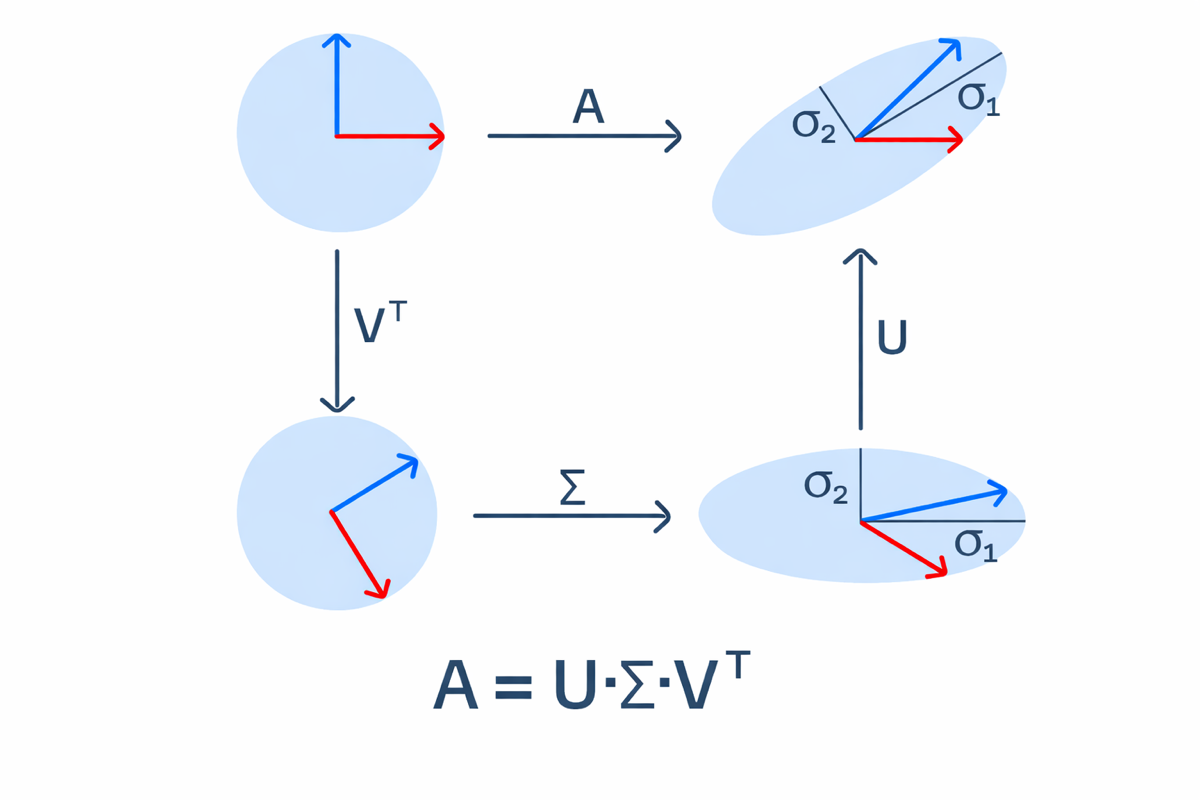

## Conclusion

Take an $m\times n$ matrix $A$ with rank equal to $r$.

There are orthogonal matrices $U$ and $V$ (of sizes $m$ and $n$, respectively), and a diagonal $m\times n$ matrix $\Sigma$ with non-negative entries, such that

$$
A = U\Sigma V^T.
$$

The diagonal entries of $\Sigma$ are the singular values of $A$.

There are exactly $r$ non-zero singular values, which are in decreasing order

$$
\sigma_1 \ge \sigma_2 \ge \cdots \ge \sigma_r > 0.
$$

In order to compute the decomposition, you first calculate a spectral decomposition for

$$
A^TA = VDV^T
$$

and then the first $r$ columns of $U$ are given by

$$
u_j=\frac{1}{\sigma_j}Av_j.
$$

The geometry of the linear transformation associated with $A$ is the composition of an isometry, a stretching, and another isometry.